In [1]:
import numpy as np

from itkwidgets import view
import matplotlib.pyplot as plt

import site
site.addsitedir("../src")

from mocoreg import mocoreg

In [22]:
app = mocoreg(smooth_registrations=False, debug=False)
#app.debug = True
basename = "../Data/05242023_EXP10_cumulative"
app.read_4d_bmode_matlab_file(basename+'.dat', nframes=227, nlateral=102, nelevation=102, ndepth=92)

smooth_registrations False
feature_size 0.75
multi_frame_smoothing_window_size 0
keyframe_transform_smoothing_window_size 0
max_keyframe_interval 1
keyframe_search_stepsize 1


In [23]:
app.compute_keyframes()

In [24]:
print(app.keyframes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [25]:
import time
start_time = time.perf_counter()
app.register_keyframes(app.keyframes)
end_time = time.perf_counter()

print("Time required for registration (seconds) = ", end_time-start_time)

Registering set 1 of 226: Frame = 1
Registering set 2 of 226: Frame = 2
Registering set 3 of 226: Frame = 3
Registering set 4 of 226: Frame = 4
Registering set 5 of 226: Frame = 5
Registering set 6 of 226: Frame = 6
Registering set 7 of 226: Frame = 7
Registering set 8 of 226: Frame = 8
Registering set 9 of 226: Frame = 9
Registering set 10 of 226: Frame = 10
Registering set 11 of 226: Frame = 11
Registering set 12 of 226: Frame = 12
Registering set 13 of 226: Frame = 13
Registering set 14 of 226: Frame = 14
Registering set 15 of 226: Frame = 15
Registering set 16 of 226: Frame = 16
Registering set 17 of 226: Frame = 17
Registering set 18 of 226: Frame = 18
Registering set 19 of 226: Frame = 19
Registering set 20 of 226: Frame = 20
Registering set 21 of 226: Frame = 21
Registering set 22 of 226: Frame = 22
Registering set 23 of 226: Frame = 23
Registering set 24 of 226: Frame = 24
Registering set 25 of 226: Frame = 25
Registering set 26 of 226: Frame = 26
Registering set 27 of 226: Fra

In [26]:
app.interpolate_keyframe_transforms()
print(app.keyframe_transforms[0])
print(app.transforms[1])

AffineTransform (0000025A0E2EFBC0)
  RTTI typeinfo:   class itk::AffineTransform<double,3>
  Reference Count: 1
  Modified Time: 392842378
  Debug: Off
  Object Name: 
  Observers: 
    none
  Matrix: 
    1.00262 0.00186712 0.00363908 
    -0.00182887 1.02538 -0.00399223 
    -0.0116253 0.000473652 0.990857 
  Offset: [-0.145888, -1.25085, 1.10413]
  Center: [46, 51, 51]
  Translation: [0.255648, -0.244171, 0.12721]
  Inverse: 
    0.997337 -0.00181436 -0.00367019 
    0.00182441 0.975243 0.00392261 
    0.0117005 -0.000487476 1.00918 
  Singular: 0

ComposeScaleSkewVersor3DTransform (0000025A0E686180)
  RTTI typeinfo:   class itk::ComposeScaleSkewVersor3DTransform<double>
  Reference Count: 1
  Modified Time: 536979475
  Debug: Off
  Object Name: 
  Observers: 
    none
  Matrix: 
    1.00262 0.00186712 0.00363908 
    -0.00182887 1.02538 -0.00399223 
    -0.0116253 0.000473652 0.990857 
  Offset: [-0.145888, -1.25085, 1.10413]
  Center: [46, 51, 51]
  Translation: [0.255648, -0.2441

In [27]:
app.apply_transforms()

In [28]:
tmp = [ list(app.transforms[x].GetParameters()) for x in range(len(app.transforms))]
#tmp = np.array(tmp)
#tmp = np.where(tmp>1,1,tmp)
print(len(tmp), len(app.data_array))
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])

227 227


In [29]:
print(tmp[2])
print(app.smooth_keyframe_transform_parameters(1)[0])

[0.0008709186290877177, 0.0018416965591039473, -0.002302172772371723, 0.4434127350882622, -0.25920552156295273, 0.1889206016543099, 1.007674968888509, 1.0031728542660636, 1.0002866912455668, -0.00038126724907707035, -0.00023456294783582576, -0.0003180585097582453]
0.0008709186290877177


In [30]:
from matplotlib import pyplot as plt

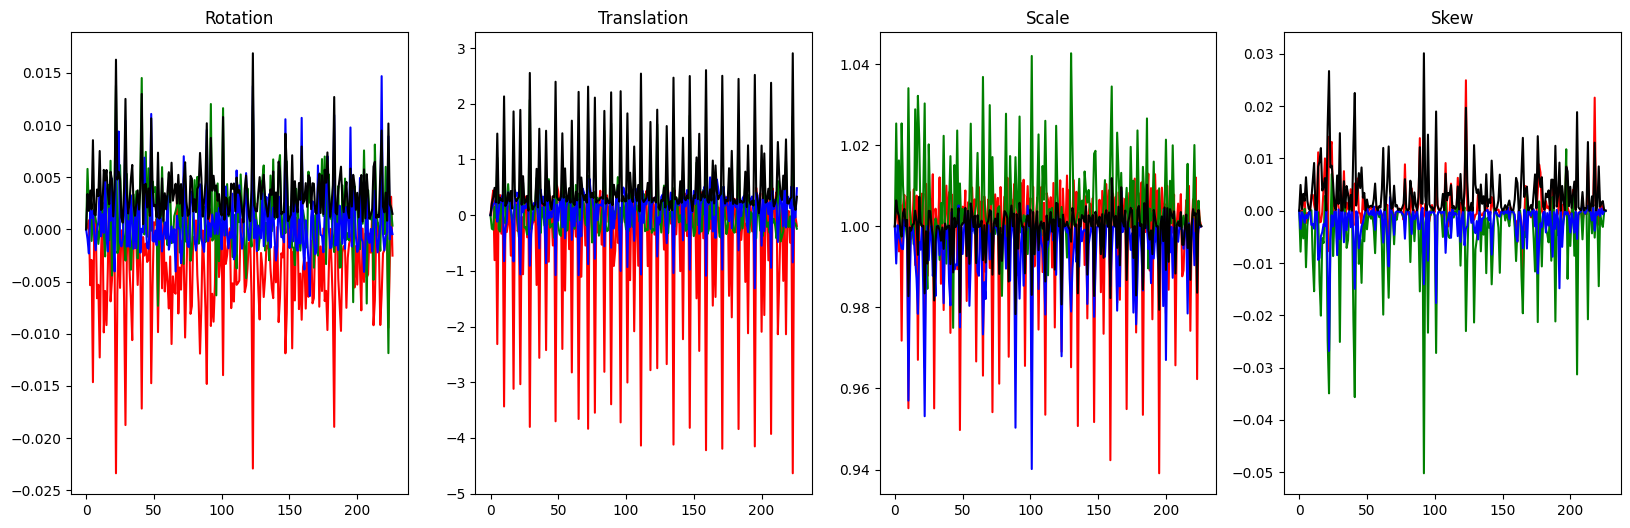

In [31]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
rlim = plt.gca().get_ylim()
plt.title("Rotation")
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
tlim = plt.gca().get_ylim()
plt.title("Translation")
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
slim = plt.gca().get_ylim()
plt.title("Scale")
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
klim = plt.gca().get_ylim()
plt.title("Skew");

In [32]:
import itk

yOrg = app.data_array[:,50,:,:].astype(np.float32)
yReg = app.data_array_reg[:,50,:,:].astype(np.float32)
itk.imwrite(itk.GetImageFromArray(yOrg), basename+"_org.mha")
itk.imwrite(itk.GetImageFromArray(yReg), basename+"_reg.mha")
app.save_matrix_transforms(basename+"_matrix.tfm")

In [13]:
meansq, diffs = app.compute_inter_keyframe_diffs()
meansq_reg, diffs_reg = app.compute_inter_keyframe_diffs(data_array=app.data_array_reg)

In [14]:
print( np.sum(np.abs(app.data_array[0] - app.data_array[10])))
print( np.sum(np.abs(app.data_array_reg[0] - app.data_array_reg[10])))

19832.537623239583
15473.893359152366


In [15]:
app2 = mocoreg(smooth_registrations=False)
app2.data_array = app.data_array_reg
app2.compute_keyframes()
print("Using new frames =", app2.keyframes)
start_time2 = time.perf_counter()
app2.register_keyframes()  # app.keyframes)
end_time2 = time.perf_counter()
print("Time required for registration (seconds) = ", end_time2-start_time2)

smooth_registrations False
feature_size 0.75
multi_frame_smoothing_window_size 0
keyframe_transform_smoothing_window_size 0
max_keyframe_interval 1
keyframe_search_stepsize 1
Using new frames = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 

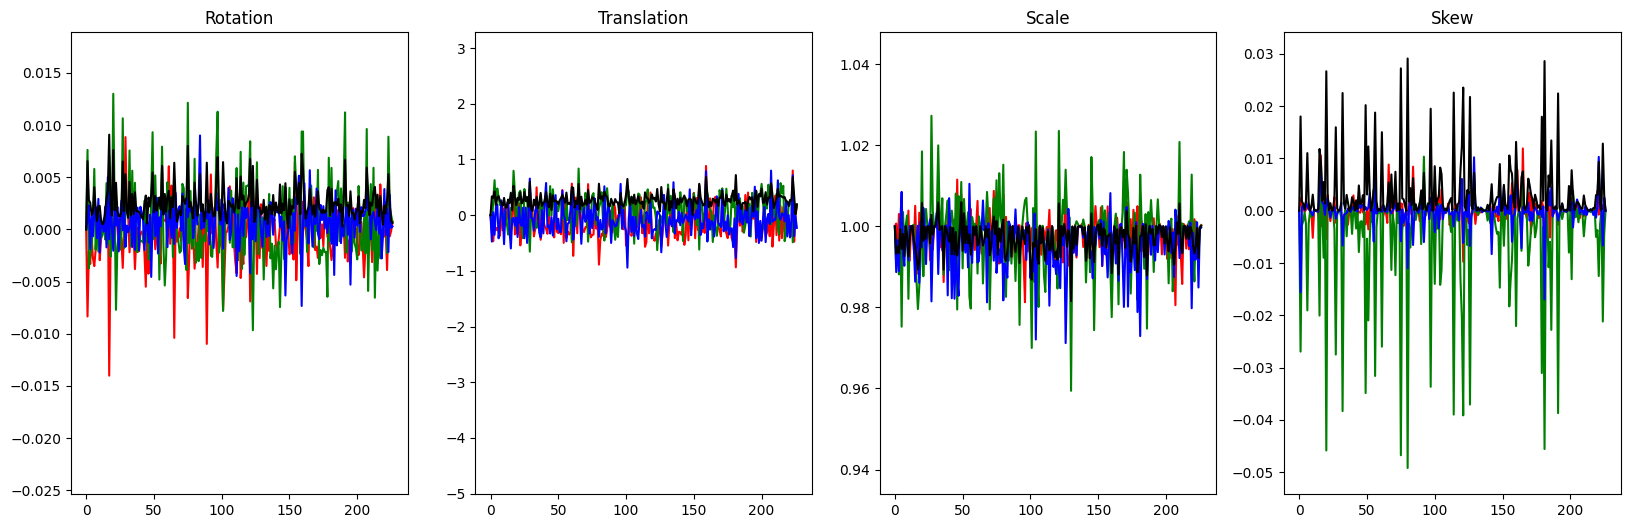

In [16]:
app2.interpolate_keyframe_transforms()
app2.apply_transforms()
tmp = [ list(app2.transforms[x].GetParameters()) for x in range(len(app2.transforms))]
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
plt.title("Rotation")
plt.gca().set_ylim(rlim)
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
plt.title("Translation")
plt.gca().set_ylim(tlim)
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
plt.title("Scale")
plt.gca().set_ylim(slim)
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
plt.title("Skew")
plt.gca().set_ylim(klim);

In [33]:
yRegReg = app2.data_array_reg[:,50,:,:].astype(np.float32)
itk.imwrite(itk.GetImageFromArray(yRegReg), basename+"_regreg.mha")
app2.save_matrix_transforms(basename+"_regreg_matrix.tfm")

In [18]:
app3 = mocoreg(smooth_registrations=False)
app3.data_array = app2.data_array_reg
app3.compute_keyframes()
print("Using new frames =", app3.keyframes)
start_time3 = time.perf_counter()
app3.register_keyframes()  # app.keyframes)
end_time3 = time.perf_counter()
print("Time required for registration (seconds) = ", end_time3-start_time3)

smooth_registrations False
feature_size 0.75
multi_frame_smoothing_window_size 0
keyframe_transform_smoothing_window_size 0
max_keyframe_interval 1
keyframe_search_stepsize 1
Using new frames = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 

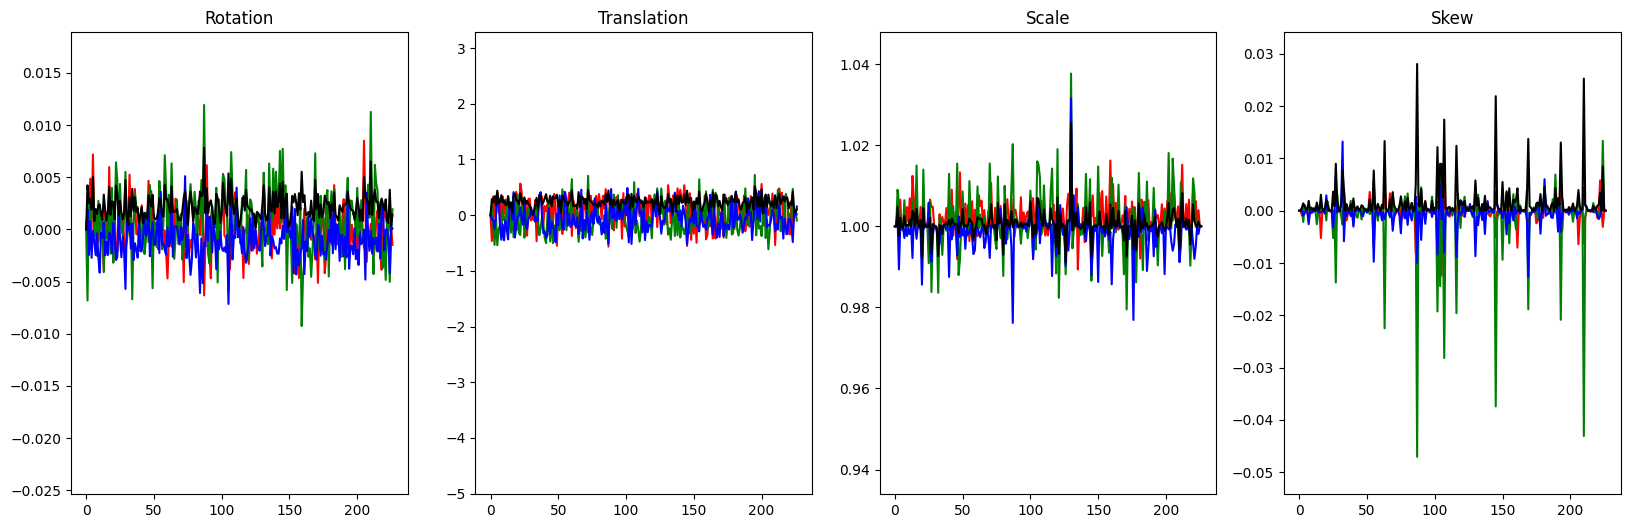

In [19]:
app3.interpolate_keyframe_transforms()
app3.apply_transforms()
tmp = [ list(app3.transforms[x].GetParameters()) for x in range(len(app3.transforms))]
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
plt.title("Rotation")
plt.gca().set_ylim(rlim)
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
plt.title("Translation")
plt.gca().set_ylim(tlim)
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
plt.title("Scale")
plt.gca().set_ylim(slim)
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
plt.title("Skew")
plt.gca().set_ylim(klim);

In [34]:
yRegRegReg = app3.data_array_reg[:,50,:,:].astype(np.float32)
itk.imwrite(itk.GetImageFromArray(yRegRegReg), basename+"_regregreg.mha")
app3.save_matrix_transforms(basename+"_regregreg_matrix.tfm")